In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/bmi-body-mass-index/bmi_train.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


In [5]:
df.shape

(400, 4)

In [6]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender',drop_first=True)
df = pd.concat([df, dummy_gender], axis=1)
df.head()

,Gender,Height,Weight,Index,Gender_Male
0,Male,161,89,4,1
1,Male,179,127,4,1
2,Male,172,139,5,1
3,Male,153,104,5,1
4,Male,165,68,2,1


In [7]:
df = df.drop('Gender',axis=1)

In [8]:
df.head()

,Height,Weight,Index,Gender_Male
0,161,89,4,1
1,179,127,4,1
2,172,139,5,1
3,153,104,5,1
4,165,68,2,1


**Visualizing Data**

<Axes: xlabel='Height', ylabel='Index'>

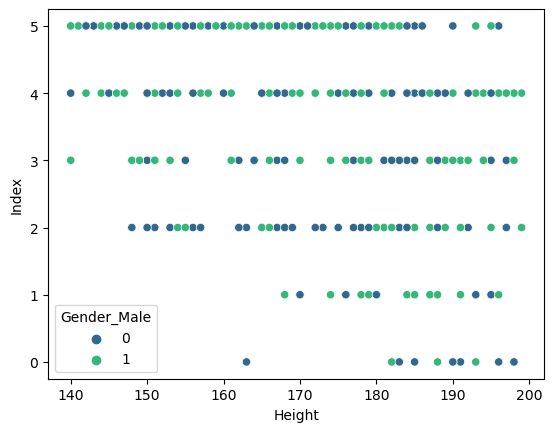

In [9]:
sns.scatterplot(x=df['Height'],y=df.Index, hue=df.Gender_Male,palette='viridis')

<Axes: xlabel='Weight', ylabel='Index'>

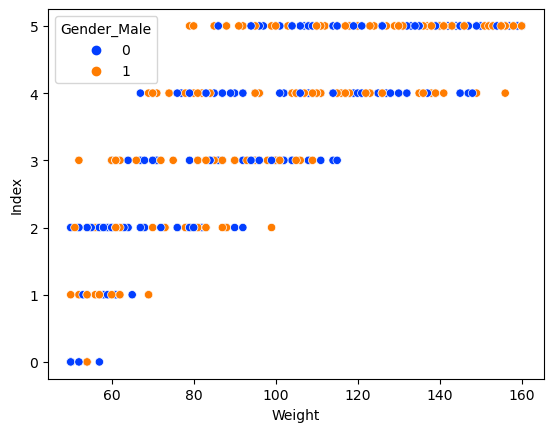

In [10]:
sns.scatterplot(x=df['Weight'],y=df.Index, hue=df.Gender_Male,palette='bright')

<Axes: xlabel='Weight', ylabel='Index'>

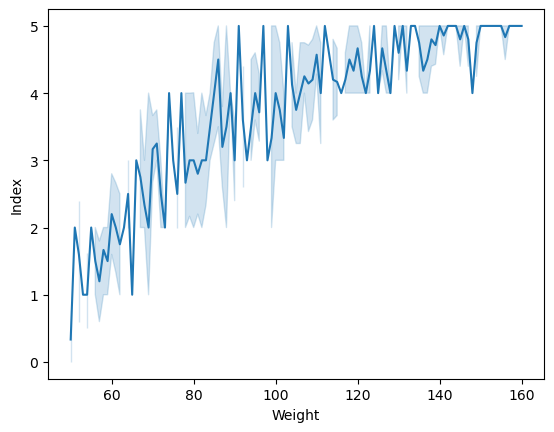

In [11]:
sns.lineplot(x=df.Weight, y=df.Index)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


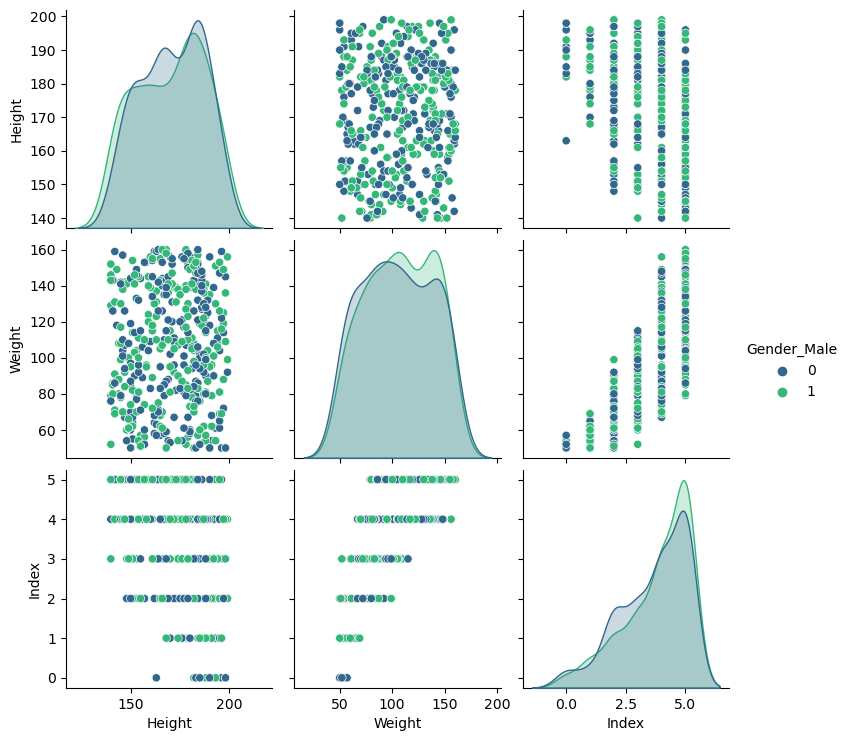

In [12]:
sns.pairplot(df,vars=['Height','Weight','Index'], hue='Gender_Male',palette='viridis')

In [13]:
from sklearn.model_selection import train_test_split
X= df[['Height','Weight','Gender_Male']]
y = df.Index
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [22]:
rfc.predict([[170,190,1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5])

In [23]:
score = rfc.score(X_test,y_test)
score

0.8125